Create sociograms for the persons-by-persons network and the committee-by committee network for a given relevant problem. Create one-mode network and two-node network for the same.

For example:
Eight employees at a small company were asked to choose 3 movies that they would
most enjoy watching for the upcoming company movie night. These choices are stored in the file Employee_Movie_Choices.txt.

A second file, Employee_Relationships.txt, has data on the relationships between different coworkers.
The relationship score has value of -100 (Enemies) to +100 (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.
Both files are tab delimited.
Load in the bipartite graph from Employee_Movie_Choices.txt and return that graph.


Add nodes attributes named 'type' where movies have the value 'movie' and employees
have the value 'employee' and return that graph.
Find a weighted projection of the graph from answer two which tells us how many
movies different pairs of employees have in common.
Find the Pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be
treated as a 0, not a missing value, and should be included in the correlation.


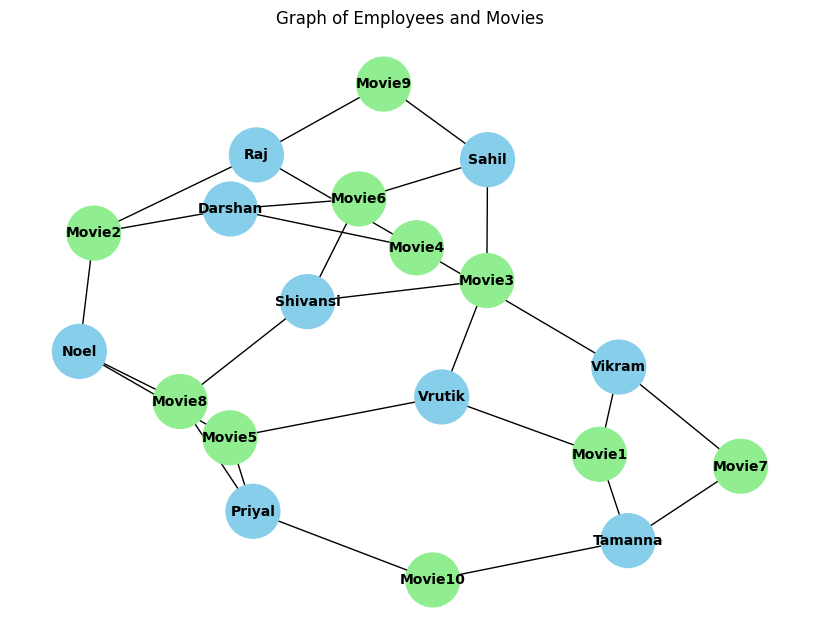

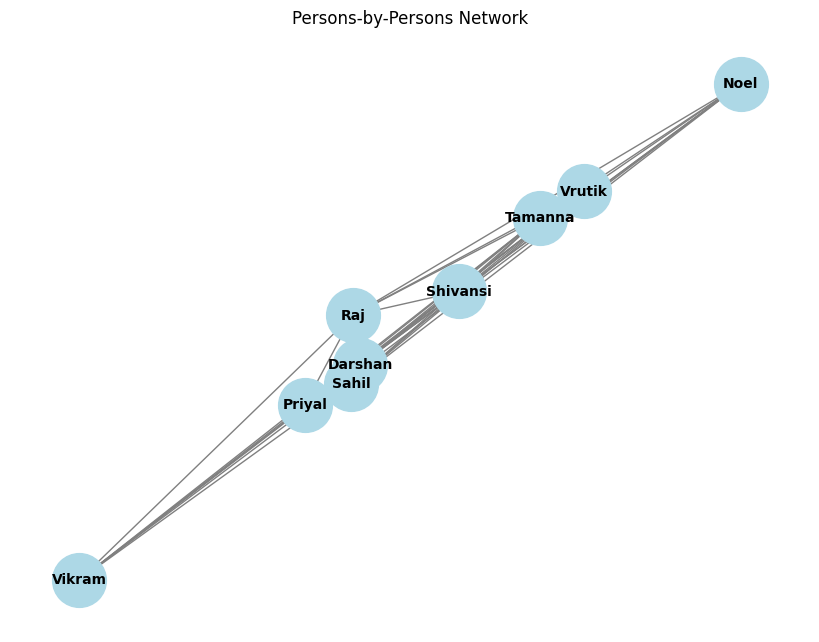

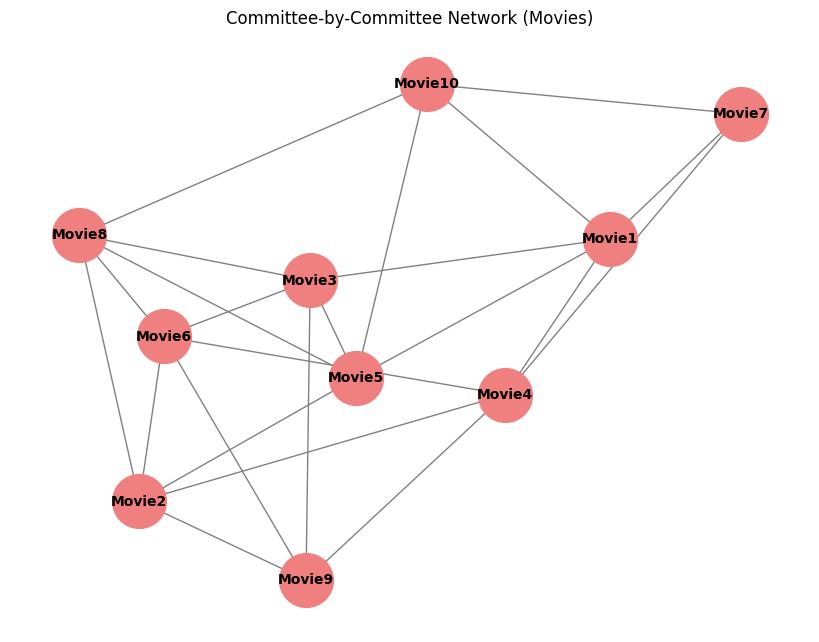

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load data from Excel files
movie_choices = pd.read_excel('Employee_Movie_Choices.xlsx')
relationships = pd.read_excel('Employee_Relationships.xlsx')

# Create a bipartite graph
B = nx.Graph()

# Define the sets of nodes
employees = set(movie_choices['Employee'])
movies = set(movie_choices['Movie'])

# Add nodes with 'type' attribute
B.add_nodes_from(employees, type='employee')
B.add_nodes_from(movies, type='movie')

# Add edges between employees and movies
for _, row in movie_choices.iterrows():
    B.add_edge(row['Employee'], row['Movie'])

# Draw the bipartite graph
def draw_bipartite_graph(G, title):
    pos = nx.spring_layout(G)  # Use spring_layout for better visualization
    plt.figure(figsize=(8,6))  # Adjust figure size
    node_colors = ['skyblue' if G.nodes[n]['type'] == 'employee' else 'lightgreen' for n in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

# Draw the bipartite graph with employees and movies
draw_bipartite_graph(B, "Graph of Employees and Movies")

# Create a persons-by-persons network based on relationships
G = nx.Graph()

# Add edges based on the relationships
for _, row in relationships.iterrows():
    if row['Score'] != 0:  # Exclude neutral scores
        G.add_edge(row['Employee1'], row['Employee2'], weight=row['Score'])

# Draw the persons-by-persons network
def draw_persons_network(G, title):
    pos = nx.spring_layout(G)  # Use spring_layout for better visualization
    plt.figure(figsize=(8,6))  # Adjust figure size
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

# Draw the persons-by-persons network
draw_persons_network(G, "Persons-by-Persons Network")

# Create a committee-by-committee network (movie network based on shared employees)
committee_network = nx.Graph()

# Add nodes (committees) for movies
committee_network.add_nodes_from(movies)

# Add edges between movies that have at least one common employee
for movie1 in movies:
    for movie2 in movies:
        if movie1 != movie2:
            employees1 = set(movie_choices[movie_choices['Movie'] == movie1]['Employee'])
            employees2 = set(movie_choices[movie_choices['Movie'] == movie2]['Employee'])
            if employees1 & employees2:  # If there is at least one common employee
                committee_network.add_edge(movie1, movie2)

# Draw the committee-by-committee network
def draw_committee_network(G, title):
    pos = nx.spring_layout(G)  # Use spring_layout for better visualization
    plt.figure(figsize=(8,6))  # Adjust figure size
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=1500, font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

# Draw the committee-by-committee network
draw_committee_network(committee_network, "Committee-by-Committee Network (Movies)")



In [ ]:

# Create a weighted projection of the bipartite graph
P = nx.bipartite.weighted_projected_graph(B, employees)

# Extract the number of common movies for each pair of employees
common_movies_count = {(e1, e2): P[e1][e2]['weight'] for e1, e2 in P.edges()}

# Prepare data for Pearson correlation
relationship_scores_list = []
common_movies_count_list = []

# Create a dictionary for quick lookup of relationship scores
relationship_scores = relationships.set_index(['Employee1', 'Employee2'])['Score'].to_dict()
# Add reverse pairs to the dictionary
relationship_scores.update({(e2, e1): score for (e1, e2), score in relationship_scores.items()})

# Match pairs and collect data
for (e1, e2) in P.edges():
    score = relationship_scores.get((e1, e2), 0)  # Default to 0 if not found
    common_movies = common_movies_count.get((e1, e2), 0)  # Default to 0 if not found
    relationship_scores_list.append(score)
    common_movies_count_list.append(common_movies)

# Calculate Pearson correlation
correlation, _ = pearsonr(relationship_scores_list, common_movies_count_list)

print(f"Pearson correlation between employee relationship scores and number of movies in common: {correlation:.2f}")

Pearson correlation between employee relationship scores and number of movies in common: -0.18


In [ ]:
# Degree and Centrality Measures for Bipartite Graph

# Calculate and print node degrees
print("Degrees for Bipartite Graph (Employees and Movies):")
for node in B.nodes:
    print(f"{node}: {B.degree(node)}")

# Calculate and print centrality measures for the bipartite graph
degree_centrality_B = nx.degree_centrality(B)
betweenness_centrality_B = nx.betweenness_centrality(B)
closeness_centrality_B = nx.closeness_centrality(B)

print("\nDegree Centrality for Bipartite Graph:")
for node, centrality in degree_centrality_B.items():
    print(f"{node}: {centrality:.4f}")

print("\nBetweenness Centrality for Bipartite Graph:")
for node, centrality in betweenness_centrality_B.items():
    print(f"{node}: {centrality:.4f}")

print("\nCloseness Centrality for Bipartite Graph:")
for node, centrality in closeness_centrality_B.items():
    print(f"{node}: {centrality:.4f}")

# Degree and Centrality Measures for Persons-by-Persons Network

# Calculate and print node degrees
print("\nDegrees for Persons-by-Persons Network:")
for node in G.nodes:
    print(f"{node}: {G.degree(node)}")

# Calculate and print centrality measures for the persons-by-persons network
degree_centrality_G = nx.degree_centrality(G)
betweenness_centrality_G = nx.betweenness_centrality(G)
closeness_centrality_G = nx.closeness_centrality(G)

print("\nDegree Centrality for Persons-by-Persons Network:")
for node, centrality in degree_centrality_G.items():
    print(f"{node}: {centrality:.4f}")

print("\nBetweenness Centrality for Persons-by-Persons Network:")
for node, centrality in betweenness_centrality_G.items():
    print(f"{node}: {centrality:.4f}")

print("\nCloseness Centrality for Persons-by-Persons Network:")
for node, centrality in closeness_centrality_G.items():
    print(f"{node}: {centrality:.4f}")

# Degree and Centrality Measures for Committee-by-Committee Network

# Calculate and print node degrees
print("\nDegrees for Committee-by-Committee Network:")
for node in committee_network.nodes:
    print(f"{node}: {committee_network.degree(node)}")

# Calculate and print centrality measures for the committee-by-committee network
degree_centrality_C = nx.degree_centrality(committee_network)
betweenness_centrality_C = nx.betweenness_centrality(committee_network)
closeness_centrality_C = nx.closeness_centrality(committee_network)

print("\nDegree Centrality for Committee-by-Committee Network:")
for node, centrality in degree_centrality_C.items():
    print(f"{node}: {centrality:.4f}")

print("\nBetweenness Centrality for Committee-by-Committee Network:")
for node, centrality in betweenness_centrality_C.items():
    print(f"{node}: {centrality:.4f}")

print("\nCloseness Centrality for Committee-by-Committee Network:")
for node, centrality in closeness_centrality_C.items():
    print(f"{node}: {centrality:.4f}")


Degrees for Bipartite Graph (Employees and Movies):
Priyal: 3
Sahil: 3
Vrutik: 3
Darshan: 3
Vikram: 3
Shivansi: 3
Raj: 3
Noel: 3
Tamanna: 3
Movie1: 3
Movie9: 2
Movie7: 2
Movie6: 3
Movie3: 3
Movie8: 3
Movie5: 3
Movie10: 2
Movie2: 3
Movie4: 3

Degree Centrality for Bipartite Graph:
Priyal: 0.1667
Sahil: 0.1667
Vrutik: 0.1667
Darshan: 0.1667
Vikram: 0.1667
Shivansi: 0.1667
Raj: 0.1667
Noel: 0.1667
Tamanna: 0.1667
Movie1: 0.1667
Movie9: 0.1111
Movie7: 0.1111
Movie6: 0.1667
Movie3: 0.1667
Movie8: 0.1667
Movie5: 0.1667
Movie10: 0.1111
Movie2: 0.1667
Movie4: 0.1667

Betweenness Centrality for Bipartite Graph:
Priyal: 0.1108
Sahil: 0.0842
Vrutik: 0.1708
Darshan: 0.1057
Vikram: 0.1530
Shivansi: 0.1031
Raj: 0.0978
Noel: 0.1243
Tamanna: 0.0895
Movie1: 0.1475
Movie9: 0.0346
Movie7: 0.0325
Movie6: 0.0910
Movie3: 0.1283
Movie8: 0.1119
Movie5: 0.1051
Movie10: 0.0587
Movie2: 0.1169
Movie4: 0.1538

Closeness Centrality for Bipartite Graph:
Priyal: 0.3462
Sahil: 0.3462
Vrutik: 0.4091
Darshan: 0.3750
Vik

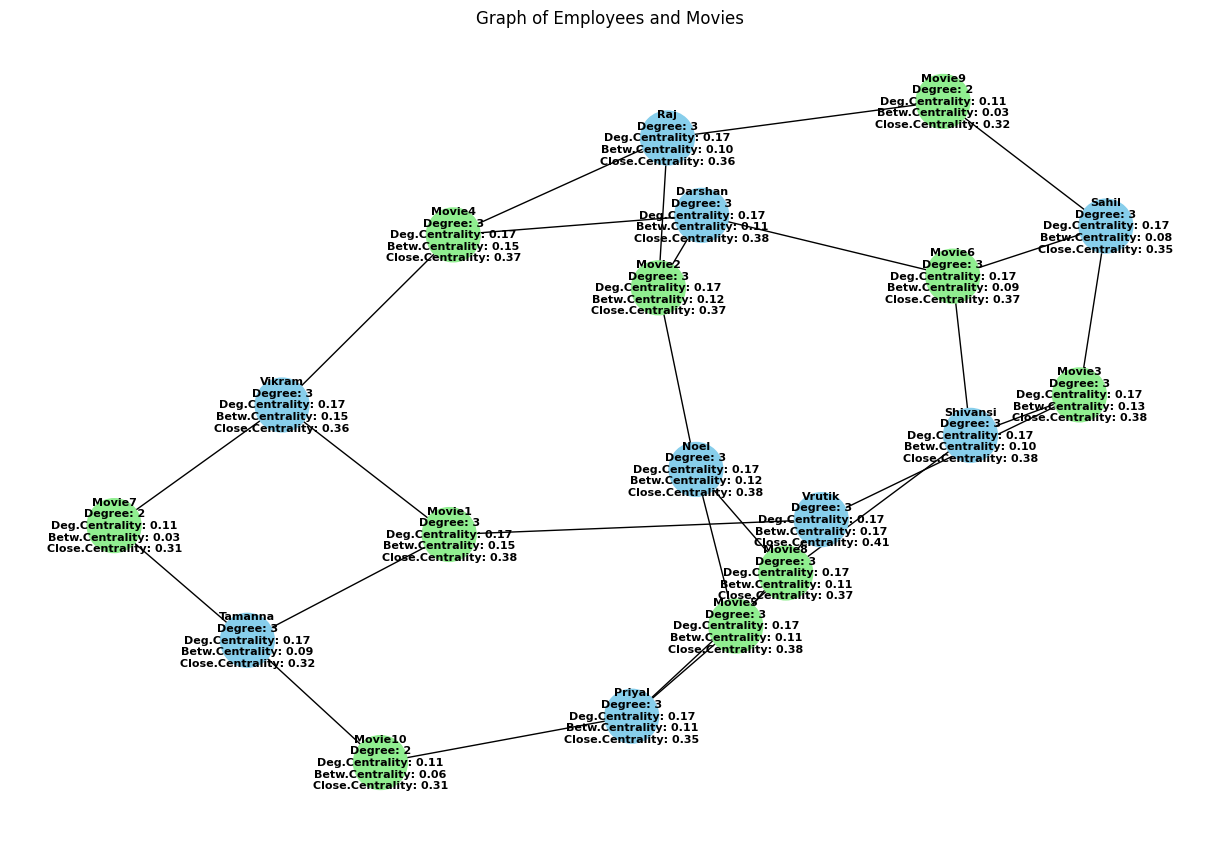

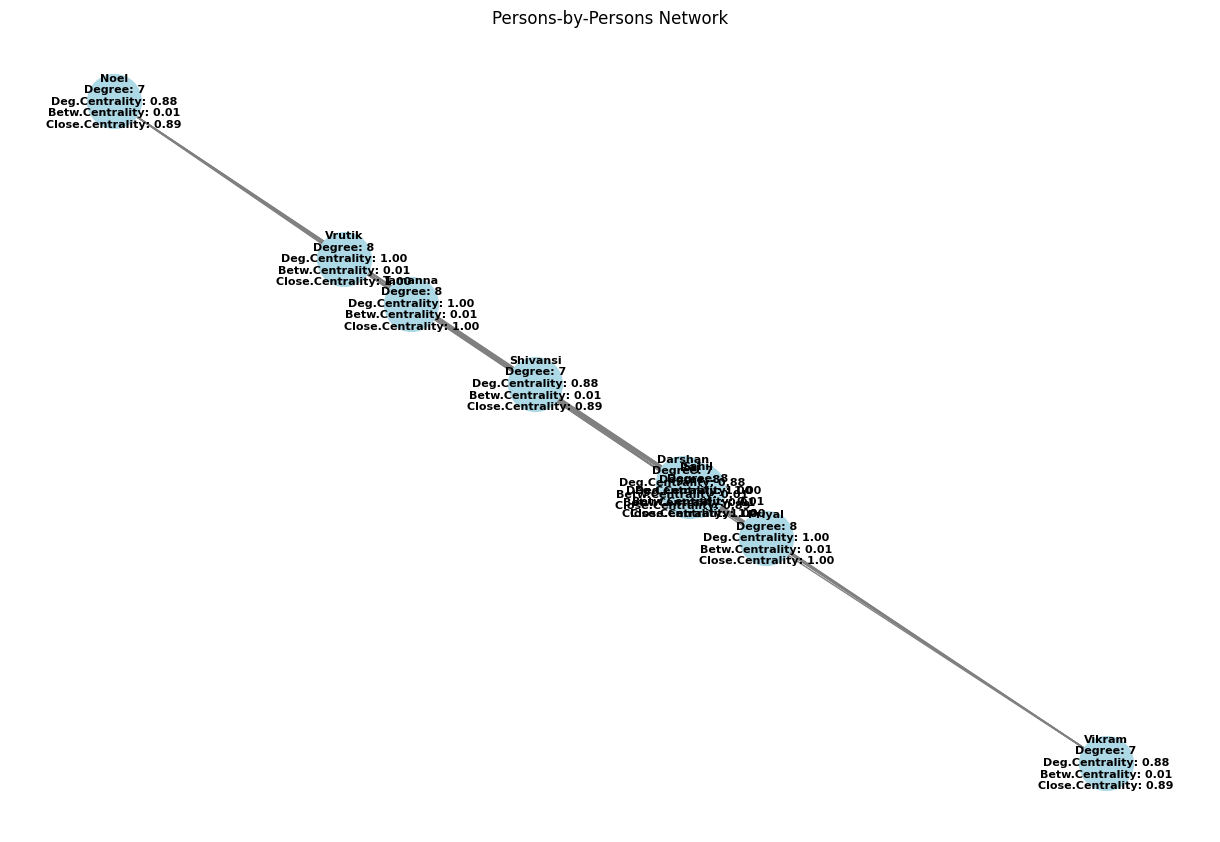

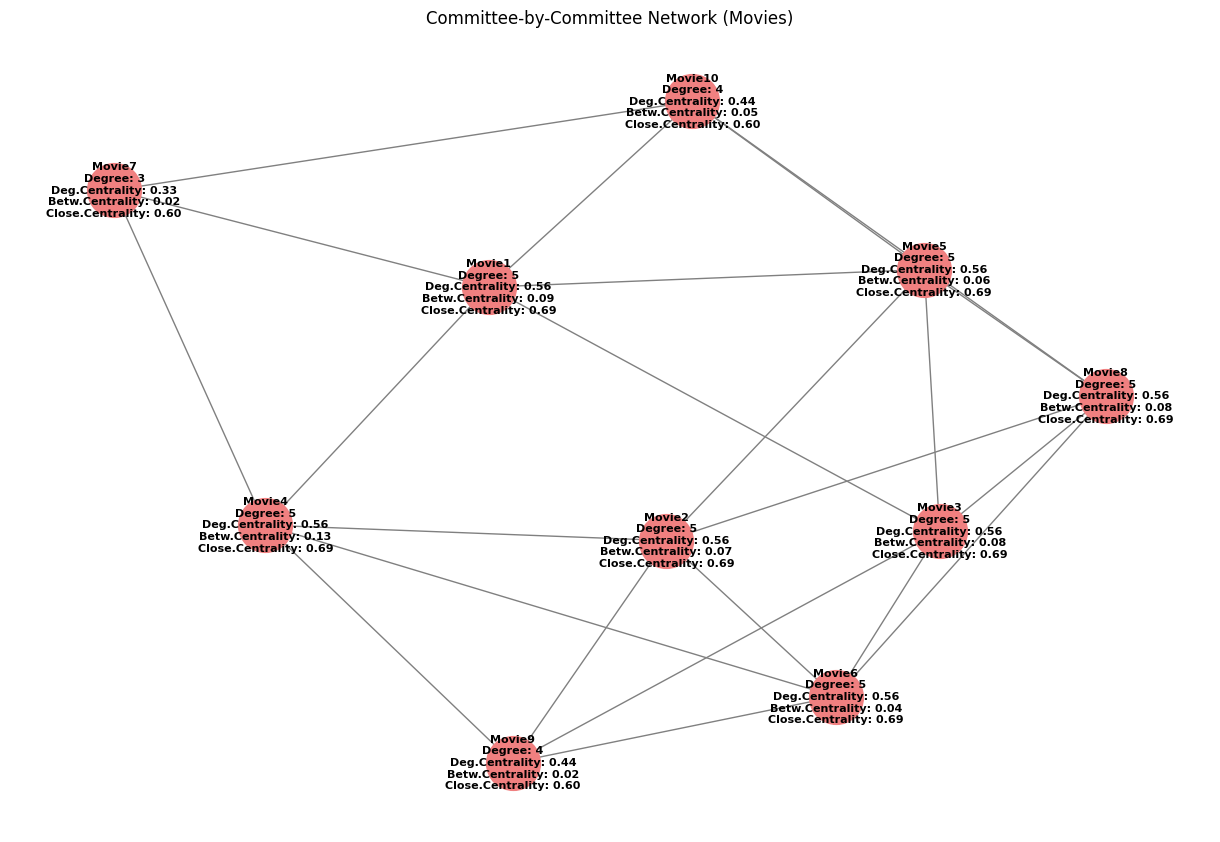

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load data from Excel files
movie_choices = pd.read_excel('Employee_Movie_Choices.xlsx')
relationships = pd.read_excel('Employee_Relationships.xlsx')

# Create a bipartite graph
B = nx.Graph()

# Define the sets of nodes
employees = set(movie_choices['Employee'])
movies = set(movie_choices['Movie'])

# Add nodes with 'type' attribute
B.add_nodes_from(employees, type='employee')
B.add_nodes_from(movies, type='movie')

# Add edges between employees and movies
for _, row in movie_choices.iterrows():
    B.add_edge(row['Employee'], row['Movie'])

# Calculate centrality and degree for bipartite graph
def calculate_bipartite_metrics(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    degrees = dict(G.degree())
    return degree_centrality, betweenness_centrality, closeness_centrality, degrees

degree_centrality_B, betweenness_centrality_B, closeness_centrality_B, degrees_B = calculate_bipartite_metrics(B)

# Draw the bipartite graph with centrality and degree values
def draw_bipartite_graph(G, title, degree_centrality, betweenness_centrality, closeness_centrality, degrees):
    pos = nx.spring_layout(G)  # Use spring_layout for better visualization
    plt.figure(figsize=(12, 8))  # Adjust figure size
    node_colors = ['skyblue' if G.nodes[n]['type'] == 'employee' else 'lightgreen' for n in G.nodes]

    # Draw the network
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold')

    # Draw node labels for centrality and degree
    labels = {node: f"{node}\nDegree: {degrees[node]}\nDeg.Centrality: {degree_centrality[node]:.2f}\nBetw.Centrality: {betweenness_centrality[node]:.2f}\nClose.Centrality: {closeness_centrality[node]:.2f}" for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

    plt.title(title)
    plt.show()

# Draw the bipartite graph with metrics
draw_bipartite_graph(B, "Graph of Employees and Movies", degree_centrality_B, betweenness_centrality_B, closeness_centrality_B, degrees_B)

# Create a persons-by-persons network based on relationships
G = nx.Graph()

# Add edges based on the relationships
for _, row in relationships.iterrows():
    if row['Score'] != 0:  # Exclude neutral scores
        G.add_edge(row['Employee1'], row['Employee2'], weight=row['Score'])

# Calculate centrality and degree for persons-by-persons network
def calculate_persons_metrics(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    degrees = dict(G.degree())
    return degree_centrality, betweenness_centrality, closeness_centrality, degrees

degree_centrality_G, betweenness_centrality_G, closeness_centrality_G, degrees_G = calculate_persons_metrics(G)

# Draw the persons-by-persons network with centrality and degree values
def draw_persons_network(G, title, degree_centrality, betweenness_centrality, closeness_centrality, degrees):
    pos = nx.spring_layout(G)  # Use spring_layout for better visualization
    plt.figure(figsize=(12, 8))  # Adjust figure size
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10, font_weight='bold')

    # Draw node labels for centrality and degree
    labels = {node: f"{node}\nDegree: {degrees[node]}\nDeg.Centrality: {degree_centrality[node]:.2f}\nBetw.Centrality: {betweenness_centrality[node]:.2f}\nClose.Centrality: {closeness_centrality[node]:.2f}" for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

    plt.title(title)
    plt.show()

# Draw the persons-by-persons network with metrics
draw_persons_network(G, "Persons-by-Persons Network", degree_centrality_G, betweenness_centrality_G, closeness_centrality_G, degrees_G)

# Create a committee-by-committee network (movie network based on shared employees)
committee_network = nx.Graph()

# Add nodes (committees) for movies
committee_network.add_nodes_from(movies)

# Add edges between movies that have at least one common employee
for movie1 in movies:
    for movie2 in movies:
        if movie1 != movie2:
            employees1 = set(movie_choices[movie_choices['Movie'] == movie1]['Employee'])
            employees2 = set(movie_choices[movie_choices['Movie'] == movie2]['Employee'])
            if employees1 & employees2:  # If there is at least one common employee
                committee_network.add_edge(movie1, movie2)

# Calculate centrality and degree for committee-by-committee network
def calculate_committee_metrics(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    degrees = dict(G.degree())
    return degree_centrality, betweenness_centrality, closeness_centrality, degrees

degree_centrality_C, betweenness_centrality_C, closeness_centrality_C, degrees_C = calculate_committee_metrics(committee_network)

# Draw the committee-by-committee network with centrality and degree values
def draw_committee_network(G, title, degree_centrality, betweenness_centrality, closeness_centrality, degrees):
    pos = nx.spring_layout(G)  # Use spring_layout for better visualization
    plt.figure(figsize=(12, 8))  # Adjust figure size
    nx.draw(G, pos, with_labels=False, node_color='lightcoral', edge_color='gray', node_size=1500, font_size=10, font_weight='bold')

    # Draw node labels for centrality and degree
    labels = {node: f"{node}\nDegree: {degrees[node]}\nDeg.Centrality: {degree_centrality[node]:.2f}\nBetw.Centrality: {betweenness_centrality[node]:.2f}\nClose.Centrality: {closeness_centrality[node]:.2f}" for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

    plt.title(title)
    plt.show()

# Draw the committee-by-committee network with metrics
draw_committee_network(committee_network, "Committee-by-Committee Network (Movies)", degree_centrality_C, betweenness_centrality_C, closeness_centrality_C, degrees_C)
